In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_brazil = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [3]:
df_brazil.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
0,BR0,Brazil,180.65,0.0,13.0,1.510429,7.0,8.0,1.0,47.0,4.0,0.882373,3.0,0.0,707.225360
1,BR1,Brazil,180.35,0.0,16.0,0.399053,0.0,5.0,1.0,50.0,3.0,0.306352,3.0,1.0,290.316010
2,BR2,Brazil,164.95,0.0,15.0,0.002132,NaN,5.0,0.0,52.0,3.0,0.533106,3.0,1.0,109.973544
3,BR3,Brazil,182.30,0.0,4.0,-1.823701,NaN,9.0,1.0,49.0,8.0,0.777917,NaN,NaN,0.000000
4,BR4,Brazil,NaN,NaN,NaN,NaN,NaN,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_brazil.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1', 'hhsizer1',
       'wi_newr1', 'job_cat', 'pvt_sector', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

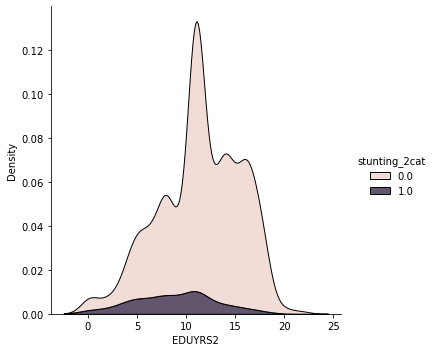

In [6]:
import seaborn as sns
sns.displot(df_brazil, x="EDUYRS2", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [24]:
Y = df_brazil['EDUYRS2']
X = df_brazil[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [25]:
formula = 'EDUYRS2 ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'EDUYRS2 ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=7.6, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=3.8),
        'agegapr1': pm.Normal.dist(mu=1, sigma=3.8),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=3.8),
        'chsexr1': pm.Normal.dist(mu=1, sigma=3.8),
        'agemonr1': pm.Normal.dist(mu=1, sigma=3.8),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=3.8),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=3.8)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_brazil, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 8000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 8_000 tune and 5_000 draw iterations (16_000 + 10_000 draws total) took 106 seconds.


In [28]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,7.840,0.843,6.304,9.442,0.013,0.009,4276.0,4276.0,4277.0,5449.0,1.0
stunting_2cat,-1.040,0.238,-1.482,-0.589,0.002,0.002,9805.0,9767.0,9805.0,7564.0,1.0
agegapr1,-0.014,0.017,-0.045,0.018,0.000,0.000,13097.0,7895.0,13095.0,7322.0,1.0
momeduyrsr1,0.312,0.020,0.274,0.348,0.000,0.000,7687.0,7670.0,7695.0,7532.0,1.0
chsexr1,-0.950,0.137,-1.198,-0.688,0.001,0.001,10159.0,10063.0,10170.0,7914.0,1.0
agemonr1,0.017,0.019,-0.019,0.051,0.000,0.000,4465.0,4465.0,4470.0,5457.0,1.0
wi_newr1,5.994,0.448,5.165,6.828,0.005,0.004,7317.0,7312.0,7319.0,6723.0,1.0
hhsizer1,-0.319,0.041,-0.396,-0.243,0.000,0.000,8021.0,8015.0,8029.0,6857.0,1.0
sd,3.307,0.049,3.215,3.401,0.001,0.000,8974.0,8968.0,8989.0,6734.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

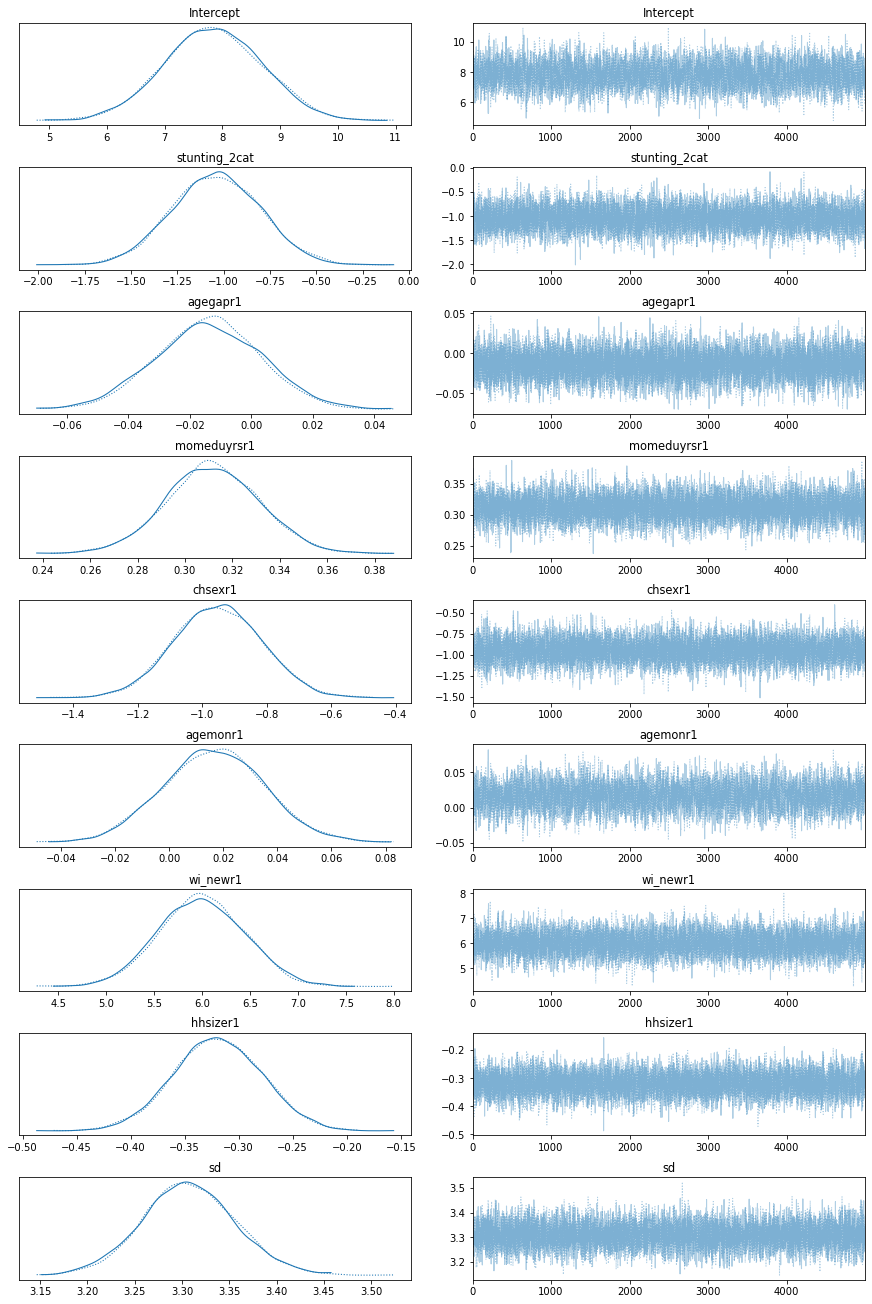

In [29]:
az.plot_trace(normal_trace)

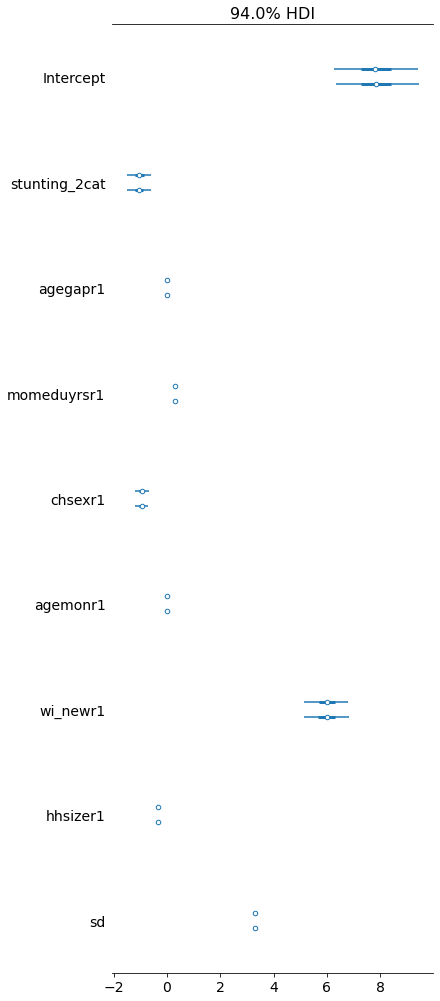

In [30]:
az.plot_forest(normal_trace);